In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


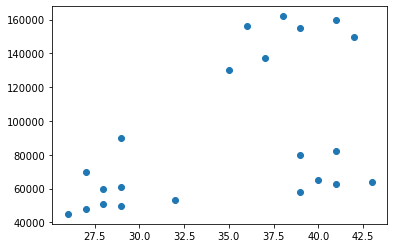

In [6]:
plt.scatter(df['Age'],df['Income($)'])

In [8]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [31]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


Text(0, 0.5, 'Income($)')

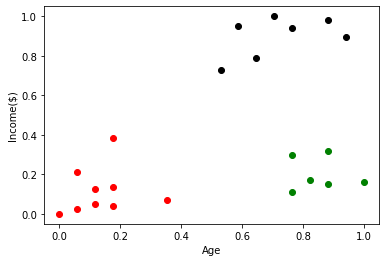

In [32]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="black")

plt.xlabel('Age')
plt.ylabel('Income($)')


The scatter plot shows the group division is not what we have expected so now we are using MinMaxScalar function for scalling

In [33]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [34]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [35]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


Text(0, 0.5, 'Income($)')

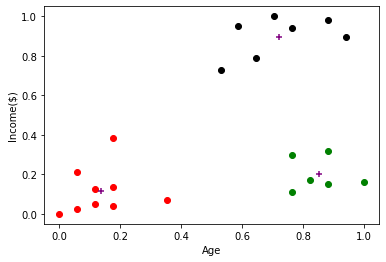

In [37]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster ==1]
df3 = df[df.cluster ==2]

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')

**Elbow Graph**

In [39]:
k_rng =  range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

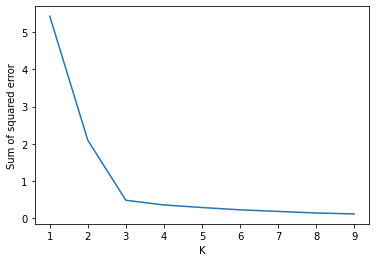

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)